<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Notebook 12 Widgets with `ipywidgets`

In this Notebook, we learn how to add interactivity to graphs using `IPython` widgets. A widget (phonetic: ˈwɪdʒɪt') is an interactive part of a user interface. Examples are *radio buttons*, where you can select only one button at a time or *sliders* which you can, well, slide to change something.

### `ipywidgets`
The package `ipywidgets` constains the IPython widgets. They are still in a somewhat experimental state, but they are very cool. New features will be added in the future and some of the current features may change. This Notebook is designed to use ipywidgets 5.X and Python version 3 in combination with `%matplotlib inline`. Very cool new features are in the works, so keep an eye out for an `ipywidgets` update. We start by importing our common pacakges. In addition, the `ipywidgets` package is imported and aliased as `widgets`, and the interact function is imported separately from the `ipywidgets` package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact

### Creating a widget
The process for creating a widget that can change something on a graph is the same for each widget: 

1. Write a function that creates the graph
2. Make sure the input arguments of the function are the things you want to change.
3. Select a widget to change the input arguments of the function

### Slider
Consider the graph of a circle. We want to use a slider to change the radius of the circle. First we write a function that draws the circle and takes as input argument the radius of the circle. An axis is created with the `subplot` command, which allows you to specify many other specifics of the axis, such as the aspect ratio, and the limits of the axes. Recall that the first argument of the `subplot` package is `111` to specify that we want 1 row of graphs, 1 column of graphs and we want graph number 1.

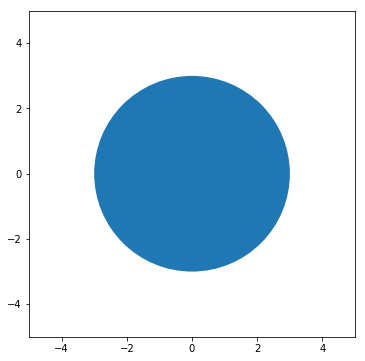

In [2]:
from matplotlib.patches import Circle

def plot_circle(r=1):
    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, aspect='equal', xlim=(-5, 5), ylim=(-5,5))
    c = Circle((0, 0), radius=r)
    ax.add_patch(c)
    
plot_circle(r=3)

An interactive slider can be created with the `interact` function of `ipywidgets`. The first argument of the `interact` function is the method that `interact` should call (in this case `plot_circle`), and as a keyword argument, the radius `r` is used, which is the first argument of the `plot_circle` method. The value of `r` is defined as a tuple, which are the minimum and maximum values of the slider. Note that you can move the slider to select different radii between the specified min and max values of 1 and 5, respectively. The slider sets integer values of the radius by default. Also note the grey X in the upper left-hand corner. When the X is clicked, the slider disappears.

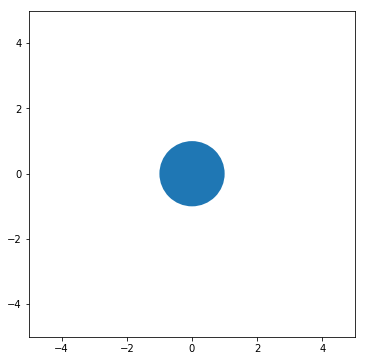

In [3]:
interact(plot_circle, r=(1,5)); 

The values of the slider may be changed into floats by making sure that at least one of the min/max values is a float. A step may also be defined by adding a third number to the tuple. For example, `r=(1, 5, 0.5)` allows the slider to change the radius from 1 to 5 with steps of 0.5.

Multiple sliders may be added by specifying multiple keywords. For example, the $x$-location of the center of the circle may be changed in addition to the radius by creating a function that takes both the radius and the $x$-location of the circle as input arguments and then uses the `interact` command with two keyword arguments.

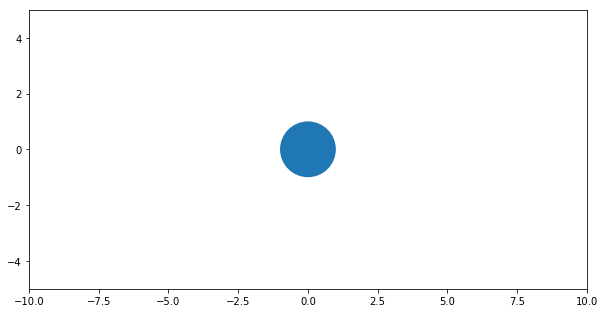

In [4]:
def plot_circle(r=1, x0=0):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot(111, aspect='equal', xlim=(-10, 10), ylim=(-5,5))
    c = Circle((x0, 0), radius=r)
    ax.add_patch(c)
    
interact(plot_circle, r=(1, 5, 0.01), x0=(-5, 5, 0.5));

### Dropdown widget
A dropdown widget can be added with the `interact` command by specifying a list of strings. For example, the color of the circle example used above, can be changed interactively as follows

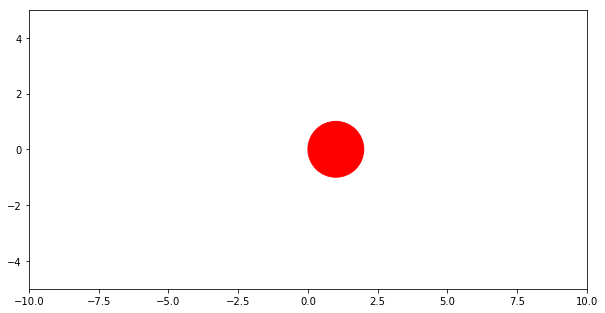

In [5]:
def plot_circle(r=1, x0=0, color='b'):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot(111, aspect='equal', xlim=(-10, 10), ylim=(-5,5))
    c = Circle((x0, 0), radius=r, color=color)
    ax.add_patch(c)
    
interact(plot_circle,
         r = (1, 5, 0.5),
         x0 = [1,2,3,4],
         color = ['red', 'blue', 'green']);

### Exercise 1
Create a graph that displays a filled ellipse centered at $(x,y)=(0,0)$ by using the `Ellipse` patch. Add sliders to change the `width` and `height` of the ellipse (between 1 and 5), the `angle` (between $-180^\circ$ and $+180^\circ$), and a dropdown widget to select the `color` between 'Aqua','Chocolate', and 'Fuchsia'.

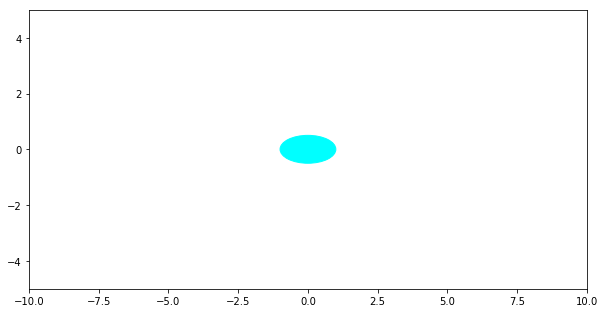

In [6]:
from matplotlib.patches import Ellipse

def plot_ellips(width=2, height=1, angle=0, color='b'):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot(111, aspect='equal', xlim=(-10, 10), ylim=(-5,5))
    E = Ellipse((0,0), width=width, height=height, angle=angle, color=color)
    ax.add_patch(E)
    
interact(plot_ellips,
         width = (1, 5, 0.01),
         height = (1, 5, 0.01),
         angle = (-180, 180),
         color = [ 'Aqua','Chocolate','Fuchsia']);

In [7]:
    E = Ellipse

### Types of widgets
There are many different types of widgets. The slider and dropdown widget are the easiest to use with `interact`, as you simply specify a range of values (for a slider) or a list of words (for a dropdown widget). All other widgets in the `ipywidgets` package must  be called directly, but still with the `interact` command. A current list of IPython widgets may be found [here](https://github.com/ipython/ipywidgets/blob/docs-4.1.1/examples/Widget%20List.ipynb)

The slider and dropwdown widget can be used in the same fashion as the other widgets. For example, the `FloatSlider` widget and the `Dropdown` widget can be called explicitly to create the same interactive graph with a circle as shown above. The `FloatSlider` and `Dropdown` widgets have some additional featurs. For example, you can specify the initial value and a description.

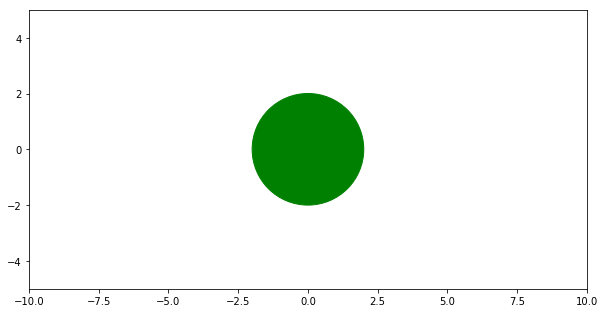

In [8]:
import ipywidgets as widgets
interact(plot_circle,
         r=widgets.FloatSlider(min=1, max=5, step=0.5, value=2, description='Radius'),
         x0=widgets.FloatSlider(min=-5, max=5, step=0.5, value=0, description='x value of center'),
         color=widgets.Dropdown(options=['red', 'blue', 'green'], value='green', description='Color') );

### Textbox widgets
Text widgets may be used to enter text or numbers. The `Text` widget is used to enter text. Here, text widgets are used to enter numbers. Let's start with the previous example, and replace the slider for the radius with a `FloatText` widget where you can enter any number. The slider for the $x$ location of the center of the circle is replaced by a `BoundedFloatText` widget, where a number can be entered between specified min and max values. Similarly, there is a `BoundedIntText` to enter an integer rather than a float.

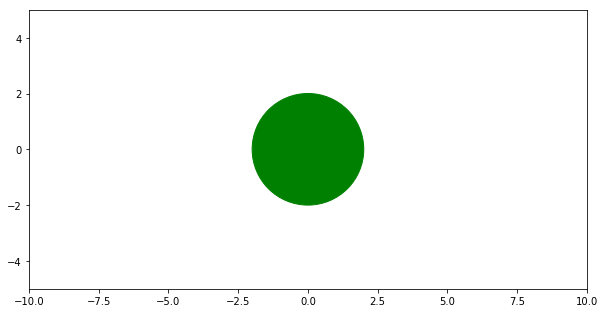

In [9]:
interact(plot_circle,
         r=widgets.FloatText(value=2, description='Radius'),
         x0=widgets.BoundedFloatText(value=0, min=-5, max=5, description='x value of center'),
         color=widgets.Dropdown(options=['red','blue','green'], value='green', description='Color'));

### Checkbox and RadioButtons widgets.
A `Checkbox` widget can be checked (in which case it is `True`) or not (in which case it is `False`). In the graph below, a `Checkbox` widget is used to select whether a legend is added to the graph. A `RadioButtons` widget displays multiple options of which only one can be selected. In the graph below, a `RadioButtons` widget is used to select the color of the graph. 

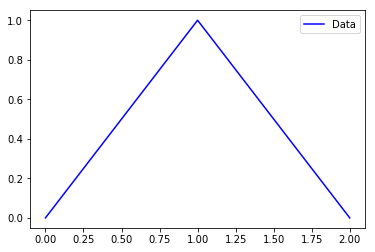

In [10]:
def plot_line(showlegend=True, color='b'):
    plt.plot([0, 1, 2], [0, 1, 0], color, label='Data')
    if showlegend: plt.legend(loc='best')
        
interact(plot_line, 
         showlegend=widgets.Checkbox(value=True, description='Show Legend'),
         color=widgets.RadioButtons(options=['blue', 'green', 'red'], value='blue', description='Color'));

### Exercise 2. Different widgets
Modify the problem of Exercise 1 such that the width and height of the axes of the ellipse can be changed with a textbox widgets, the angle with a `FloatSlider` widget, and the color with radio buttons for at least three colors.

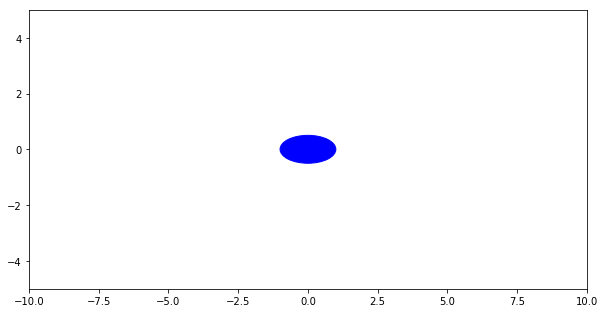

In [11]:
interact(plot_ellips,
         width = widgets.FloatText(value=2, description='Width'),
         height = widgets.FloatText(value=1, description='Height'),
         angle = widgets.FloatSlider(min=-180, max=180, step=1, value=0, description='Angle'),
         color=widgets.RadioButtons(options=['Aqua','Chocolate','Fuchsia','blue', 'green', 'red'], value='blue', description='Color'));

### Exercise 3. Daily rainfall data for each year.
The file `rotterdam_weather_2000_2010.txt` contains daily weather data at the weather station Rotterdam for the period 2000-2010 (again from the KNMI). Open the data file in an editor to see what is in it. Perform the following tasks:
* Load the data using the `read_csv` function of `pandas` making sure the dates are used as index. 
* Convert the temperature to degrees Celcius. 
* Write a function that takes as input argument a year and plots the daily temparature vs. the date for that year (recall the `.plot` function of `pandas`). Make sure the year appears in the title of the figure.
* Add a textbox widget where the year can be entered.

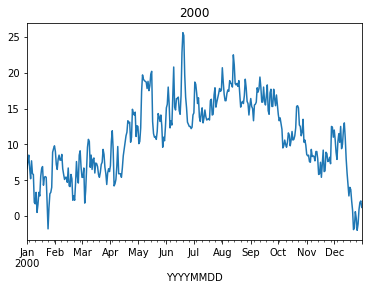

In [12]:
from IPython.display import display
from pandas import read_csv
rot = read_csv('rotterdam_weather_2000_2010.txt', 
               skiprows=11, 
               skipinitialspace=True, 
               index_col=1,
               parse_dates=[1])
rot['temp'] = rot.TG / 10

def graph(y):
    rot['temp'][rot.index.year == y].plot()
    plt.title(int(y))

interact(graph,
         y=widgets.BoundedFloatText(value=2000, min=2000, max=2010, description='year'));

### Button widget
The `ToggleButton` widget toggles between `True` and `False` every time it is clicked. This button can also be used to simply execute a function every time the button is pushed, where the `True` or `False` value of `ToggleButton` are passed to the function, but not used. For example, let's generate 10 random numbers and print them to the screen (the value of the `ToggleButton` is shown just to demonstrate the value changes, but it is not used here otherwise):

In [13]:
def print_numbers(val):
    print('value of val:', val)
    print(np.random.rand(10))
    
interact(print_numbers, 
         val=widgets.ToggleButton(description='Next'));

value of val: False
[ 0.69519799  0.26536396  0.98434234  0.22828342  0.31856609  0.14826693
  0.54330587  0.68940696  0.64066632  0.13385944]


### Exercise 4. Linear regression through random data
Create a function that generates 100 $x$ and 100 $y$ values randomly from a uniform distribution between 0 and 1 using the `np.random.rand` function. Fit a straight line using `linregress`. Plot the data (with dots) and the fitted line (with a line) on the same graph. Add the $p$-value in the title of the graph. Add a `ToggleButton` widget to create a new set of random points, a new fitted line and associated $p$-value. Recall that approximately once every 20 times, the $p$ value will be below 0.05, even though the $x$ and $y$ values are generated randomly. 

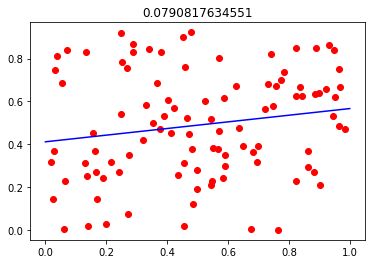

In [14]:
from scipy.stats import linregress
def rand(val):
    y = np.random.rand(100)    
    x = np.random.rand(100)
    z = linregress(x, y)
    x1 = np.linspace(0,1,2)
    plt.plot(x,y,'ro',
            x1, (x1 * z.slope + z.intercept), 'B');
    plt.title(z.pvalue)

interact(rand, 
    val=widgets.ToggleButton(description='Next'));

### Exercise 5. Soil stress. 
Consider a 10 m thick soil layer. The stress on top of the soil layer is $\sigma_0$. The phreatic surface is a distance $d$ below the top of the soil layer. The volumetric weight of the dry soil is 16 kN/m$^3$, while the volumetric weight of the saturated soil is 20 kN/m$^3$. Capillary rise is neglected. Create a function that plots, in one graph, the variation with depth of the total stress $\sigma$, the water pressure $p$, and the effective stress $\sigma'$. The vertical axis points vertically down. Add axis labels and a legend to your graph. Refer to chaper 5 in [Verruijt 2012](http://geo.verruijt.net/software/SoilMechBook2012.pdf) if you forgot how to compute stresses in soils. Add textbox widgets to enter the depth of the water table $d$ (between 0 and 10 m) and the stress at the surface $\sigma_0$ (between 0 and 100 kN/m$^2$). Add checkbox widgets to plot the total stress, the water pressure and the effective stress.

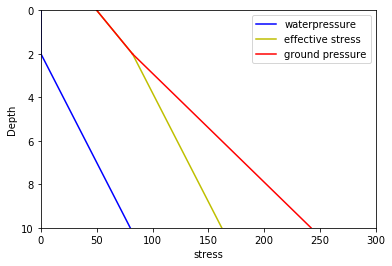

In [15]:
def soil_stress(s=50, d=2, g=True, e=True, p=True ):
    y1 = np.linspace(0,d,2)
    y2 = np.linspace(d,10,2)
    xd =  y1 * 16 + s
    xs =  (y2-d) * 20 + d * 16 + s
    xw1 = y1 * 0
    xw2 =  (y2-d) * 10
    xk = xs - xw2
    if p:
        plt.plot(xw1, y1, 'b', label='waterpressure')
        plt.plot(xw2, y2, 'B')
    if e:
        plt.plot(xk, y2, 'y', label='effective stress')
        plt.plot(xd,y1, 'y')
    if g:
        plt.plot(xd,y1, 'r')
        plt.plot(xs,y2, 'r', label='ground pressure');
    
    plt.ylim(10, 0);
    plt.xlim(0,300, 0);
    plt.xlabel('stress');
    plt.ylabel('Depth');
    if g == e == p == False:
        None
    else:
        plt.legend( loc='best');
    return None

interact(soil_stress,
         s = widgets.BoundedFloatText(value=50, min=0, max=100, description='σ0'),
         d = widgets.BoundedFloatText(value=2, min=0, max=10, description='phreatic surface'),
         g = widgets.Checkbox(value=True, description='ground pressure'),
         e = widgets.Checkbox(value=True, description='effective stress'),
         p = widgets.Checkbox(value=True, description='water pressure'),
        );

### Arranging widgets
`ipywidgets` puts all widgets below each other, which looks odd when you have many widgets (like in the exercise above). Widgets can be grouped using the `widgets.HBox` command, but it requires a slightly different workflow. First, all widgets need to be created and stored in variables. Then the widgets need to be combined in a horizontal box (or boxes) and then each box must be displayed explicitly by calling the `display` function of the `IPython.display` package. Next, all widgets are called using the `interactive` function rather than the `interact` function, and the result of the `interactive` function should be stored in a variable. And finally, you also need to call the graph you actually want to show. So in summary:

1. Create all widgets separately and store them in variables
2. Group them horizontally with the `HBox` command.
3. Use the `display` function to display the `HBox`-es.
4. Use the `interactive` function to interact with the graph (so not the `interact` function!) and store it in a variable.
5. Call the plotting function to show the graph.

As an example, let's group the two widgets for the example where we changed the size and location of a circle.

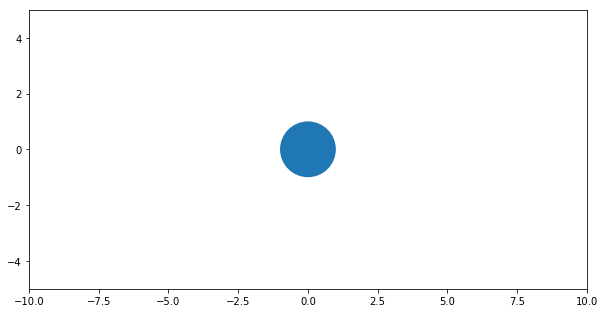

In [16]:
from ipywidgets import interactive
from IPython.display import display

def plot_circle(r=1, x0=0):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot(111, aspect='equal', xlim=(-10, 10), ylim=(-5,5))
    c = Circle((x0, 0), radius=r)
    ax.add_patch(c)

wr = widgets.FloatSlider(min=1, max=5, step=0.5, value=2, description='Radius')
wx0 = widgets.FloatSlider(min=-5, max=5, step=0.5, value=0, description='x value of center')
hb = widgets.HBox((wr, wx0))
display(hb)
ip = interactive(plot_circle, r=wr, x0=wx0)
plot_circle();

### Exercise 6. Widgets next to each other
Redo Exercise 5, but now put the two textbox widgets next to each other and on the next line put the three checkbox widgets next to each other. Note that you don't have to rewrite the function that plots the graph (you can use the one from Exercise 5). 

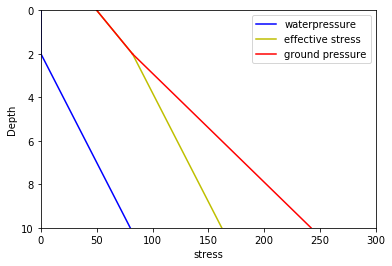

In [18]:
ws = widgets.BoundedFloatText(value=50, min=0, max=100, description='σ0')
wd = widgets.BoundedFloatText(value=2, min=0, max=10, description='phreatic surface')
wg = widgets.Checkbox(value=True, description='ground pressure')
we = widgets.Checkbox(value=True, description='effective stress')
wp = widgets.Checkbox(value=True, description='water pressure')

HB1 =  widgets.HBox((ws, wd))
HB2 =  widgets.HBox((wg, we, wp))

display(HB1)
display(HB2)

ip = interactive(soil_stress, s = ws, d=wd, g=wg, e=we, p=wp)
soil_stress();